<a href="https://colab.research.google.com/github/J-Salt/IDS/blob/main/HW5/Project5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the data

In [2]:
library(readr)#used to import the data
companyDF <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv", show_col_types = FALSE)#stores the data in companyDF
head(companyDF)#Prints the head of the DF

TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2


###Summarizing the data

In [ ]:
summary(companyDF)#Prints a summary of each column

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

###Calculating R^2


In [ ]:
correlation = cor(companyDF)#creates contingency table of correlations between all of the values
head(correlation)#Prints the head of the correlations

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


###Creating a boxplot for all values

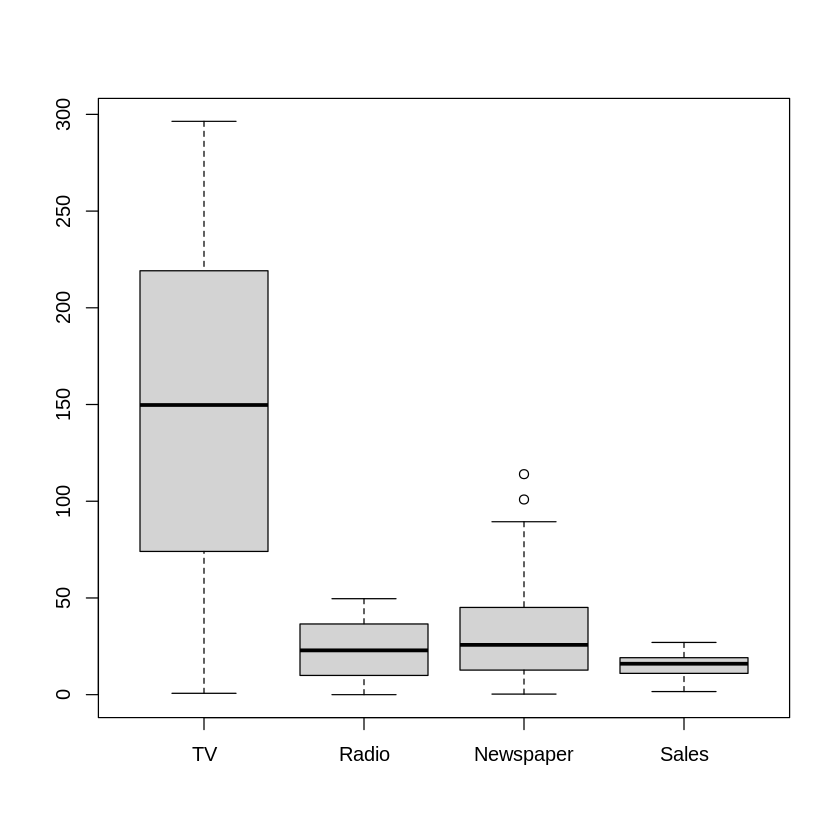

In [ ]:
boxplot(companyDF)#creates a boxplot for all columns in companyDF

###Creating histograms for each

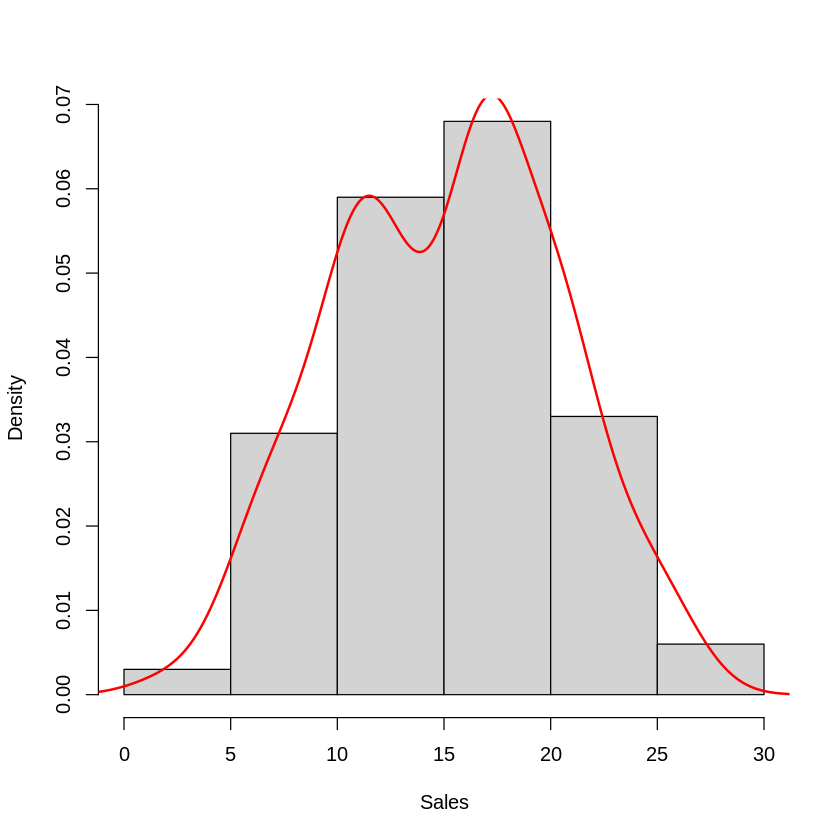

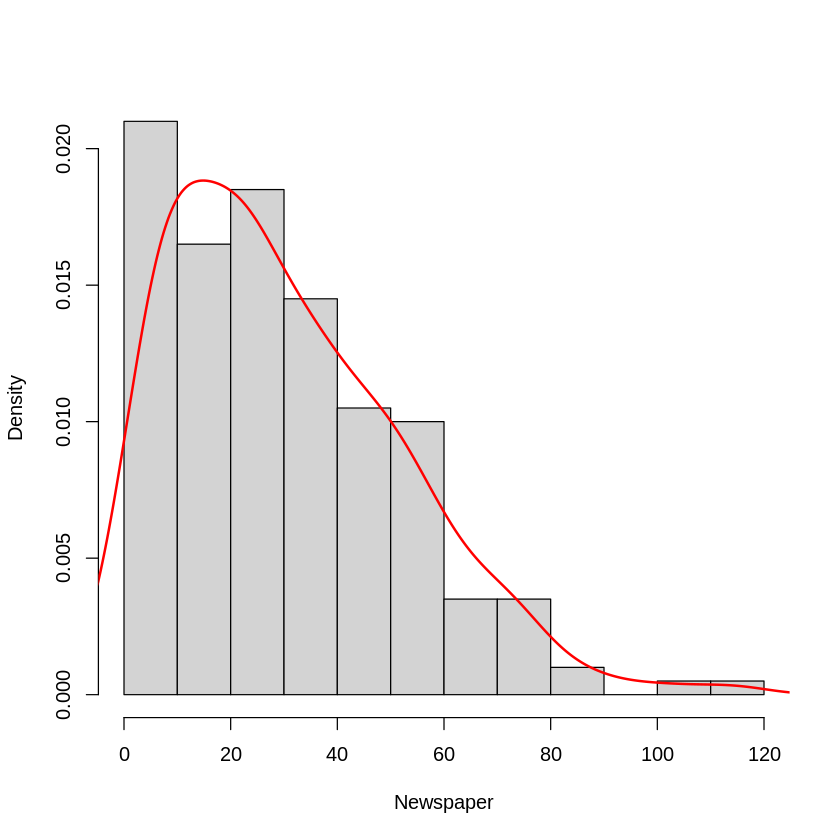

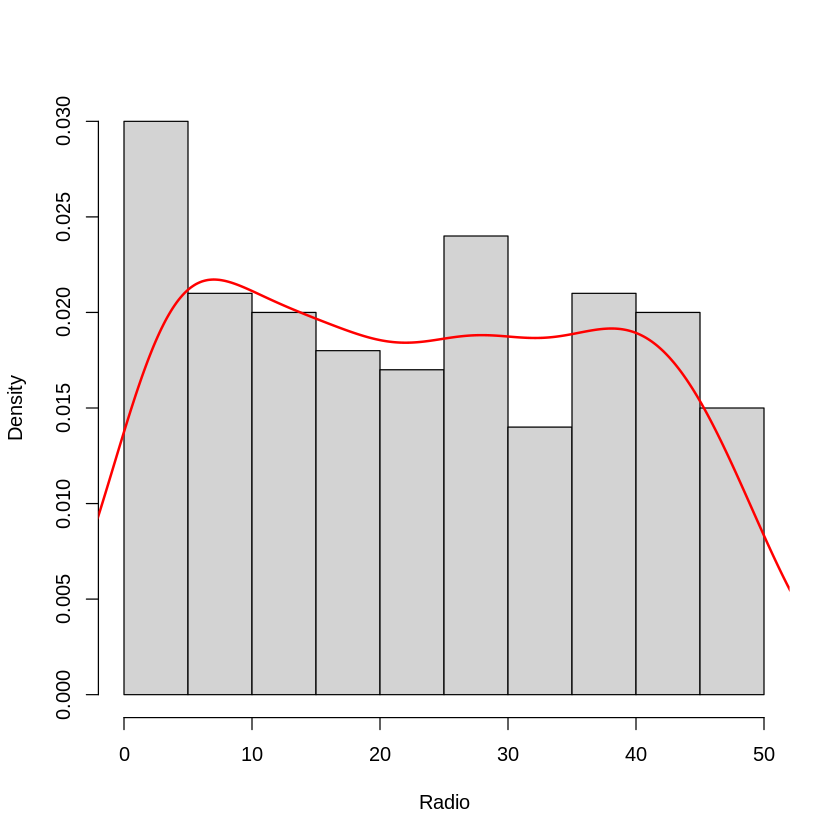

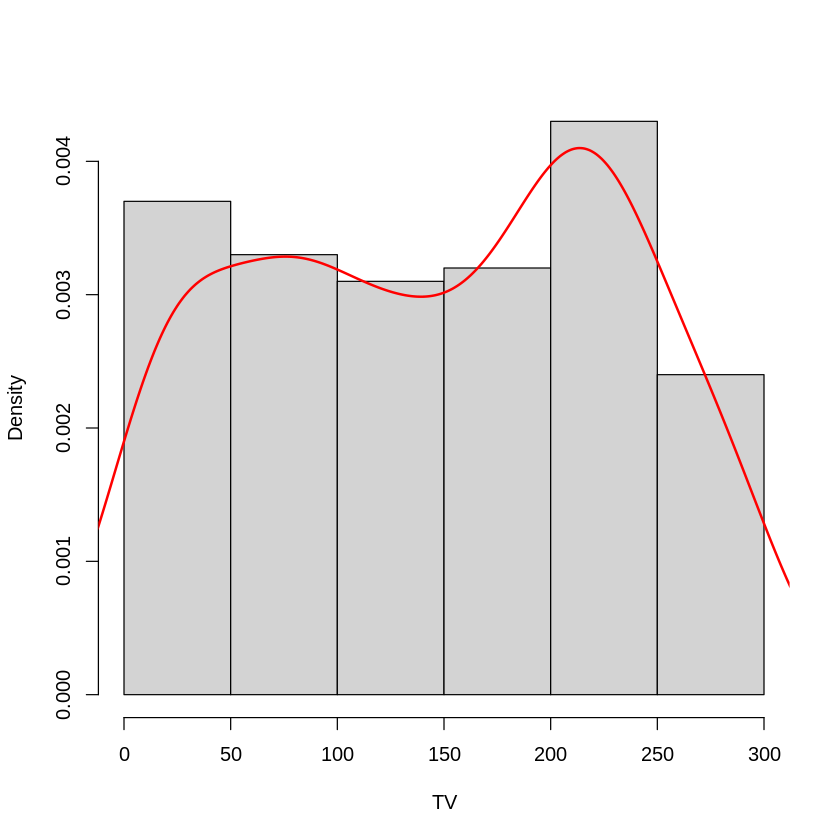

In [ ]:
hist(x=companyDF$Sales,xlab = "Sales", main = "", prob=TRUE)#Graphs a histogram of Sales
lines(density(companyDF$Sales),lwd = 2, col = "red")#adds a density line on the histogram

hist(x=companyDF$Newspaper,xlab = "Newspaper", main = "",prob=TRUE)
lines(density(companyDF$Newspaper),lwd = 2, col = "red")

hist(x=companyDF$Radio,xlab = "Radio", main = "",prob=TRUE)
lines(density(companyDF$Radio),lwd = 2, col = "red")

hist(x=companyDF$TV,xlab = "TV", main = "",prob=TRUE)
lines(density(companyDF$TV),lwd = 2, col = "red")

###Finding number of NULL values
---

In [ ]:
print("Sales:")
sum(is.null(companyDF$Sales))#Prints the number of null values in Sales column
print("TV:")
sum(is.null(companyDF$TV))
print("Newspaper:")
sum(is.null(companyDF$Newspaper))
print("Radio:")
sum(is.null(companyDF$Radio))

[1] "Sales:"


[1] 0

[1] "TV:"


[1] 0

[1] "Newspaper:"


[1] 0

[1] "Radio:"


[1] 0

###Create the scatter plots for each of the independent variables
---

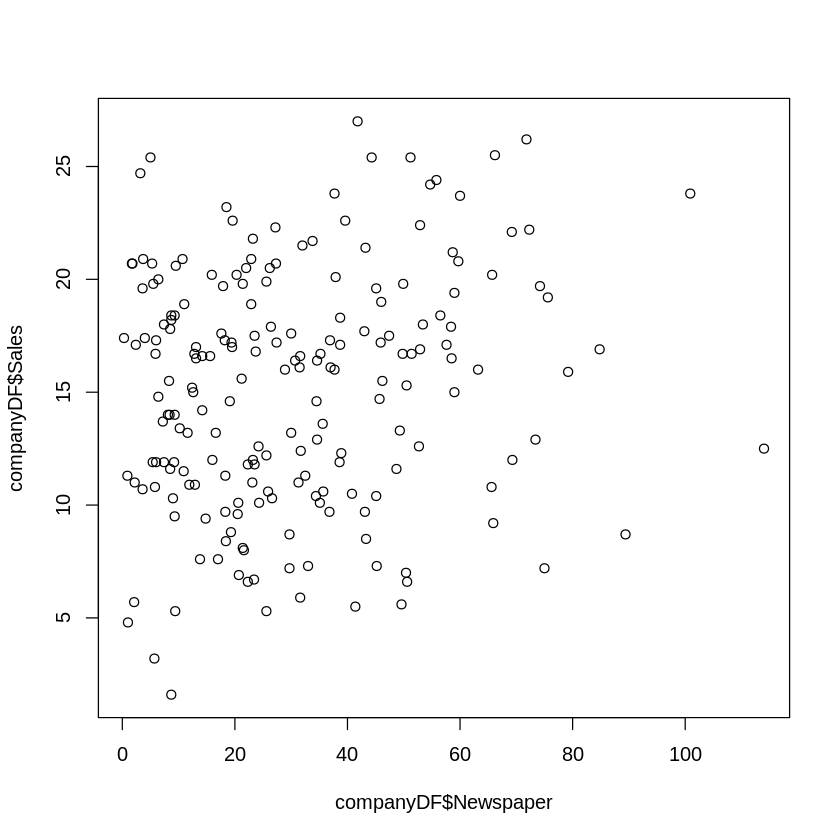

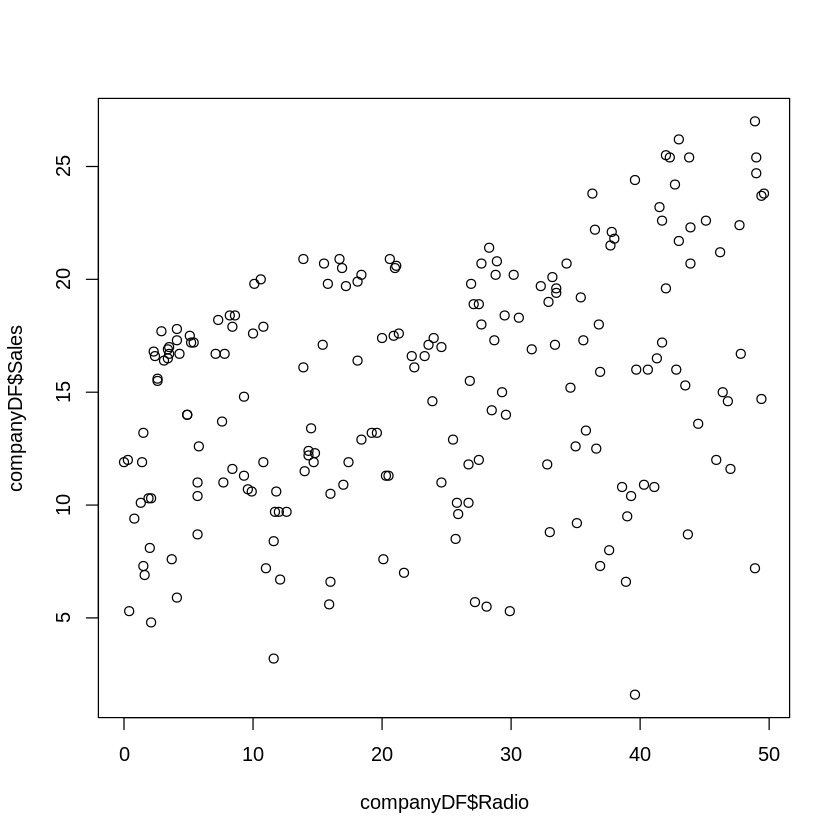

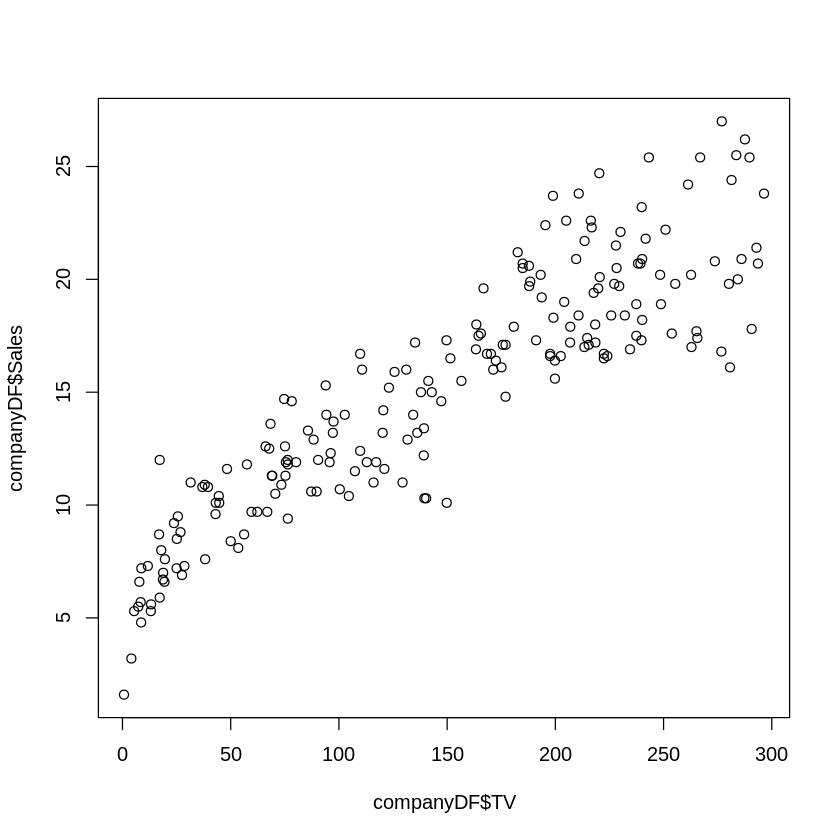

In [6]:
plot(y=companyDF$Sales, x=companyDF$Newspaper)#plots each scatter plot
plot(y=companyDF$Sales, x=companyDF$Radio)
plot(y=companyDF$Sales, x=companyDF$TV)

###Create the model using the Entire Data Set
---

In [18]:
lm1 <- lm(Sales ~ TV, data=companyDF)#creates linear regression using full set
lm1sum <- summary(lm1)#stores the summary data in lm1sum
summary(lm1)


Call:
lm(formula = Sales ~ TV, data = companyDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16


###Calculate the MSE for TV vs Sales model
---

In [19]:
mean(lm1sum$residuals^2)#Calculates MSE for lm1

[1] 5.217744

###Splitting the dataset into train and test

---



In [31]:
set.seed(1444) # Set Seed so that same sample can be reproduced in future
sample <- sample.int(n = nrow(companyDF), size = floor(.70*nrow(companyDF))) #creates arandom sample to be used to select test and train data
train <- companyDF[sample, ] #saves the train data in train
test  <- companyDF[-sample, ] #saves the test data in test
dim(train)
dim(test)

[1] 140   4

[1] 60  4

###Creating the linear model using the train set
---


Call:
lm(formula = Sales ~ TV, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-6.179 -1.494 -0.034  1.474  5.263 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.25020    0.35554   20.39   <2e-16 ***
TV           0.05354    0.00211   25.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.171 on 138 degrees of freedom
Multiple R-squared:  0.8235,	Adjusted R-squared:  0.8222 
F-statistic: 643.8 on 1 and 138 DF,  p-value: < 2.2e-16


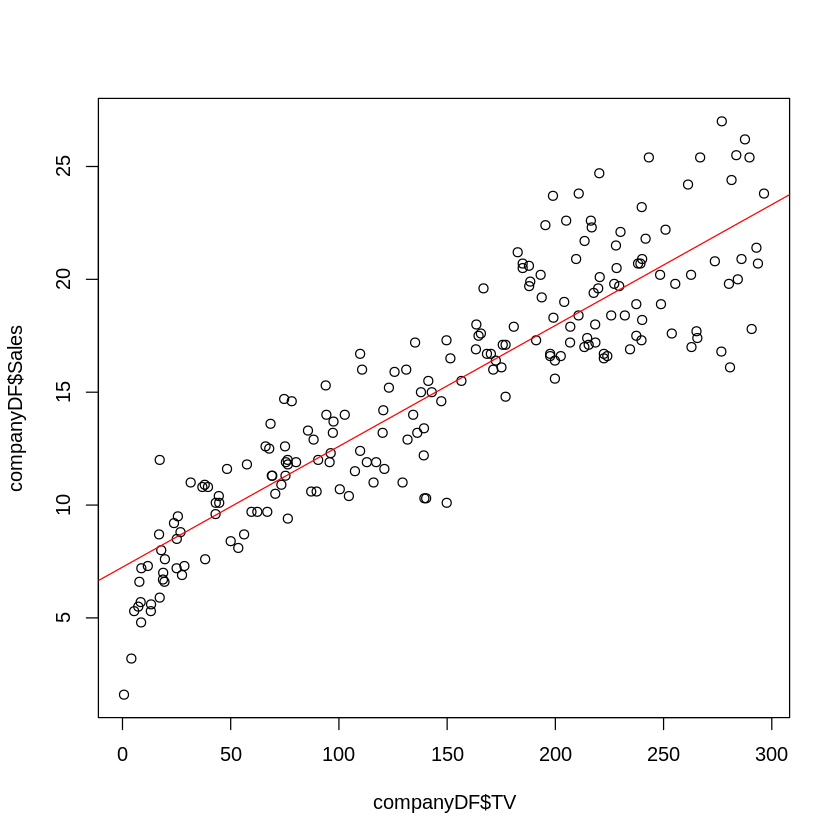

In [30]:
lm2 <- lm(Sales ~ TV, data=train)#creates model using out train set
lm2sum <- summary(lm2)#saves the summary in lm2sum
summary(lm2)
plot(y=companyDF$Sales, x=companyDF$TV)#plots the model
abline(lm2,col='red')#Adds linear regression line onto plot

###MSE for test
---

In [27]:
test_predict = predict(lm2,newdata=test)#Creates predictions for the test set
testsum <- summary(lm2)#Sums the model values
mean(testsum$residuals^2)#Calculates the mse using the residuals squared

[1] 4.646712

###Plotting both linear regressions against the data
---

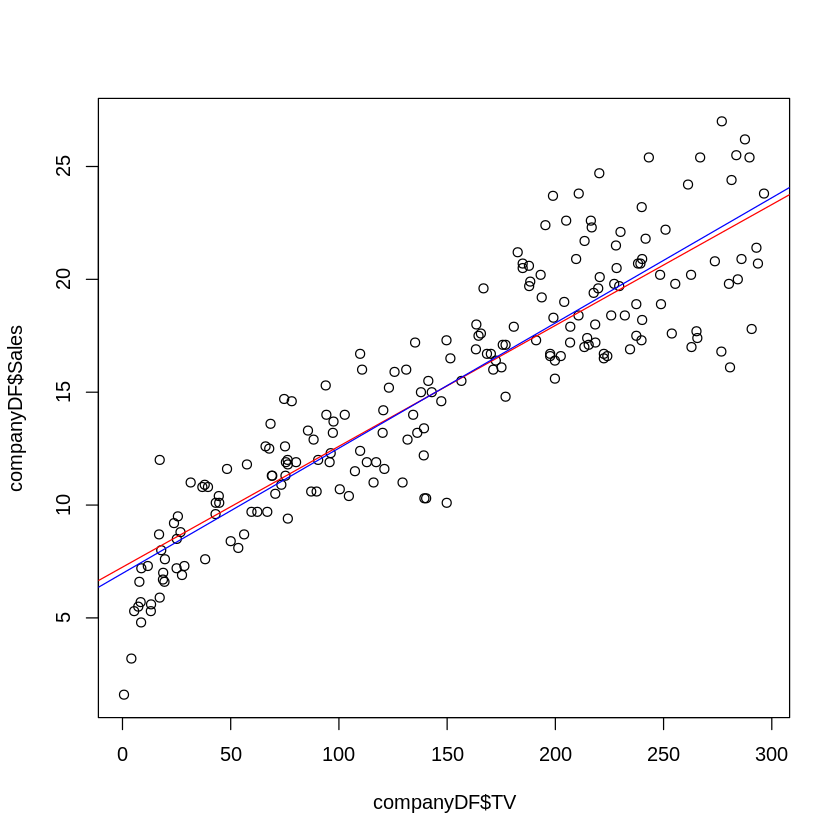

In [28]:
plot(y=companyDF$Sales, x=companyDF$TV)
abline(lm2,col='red')#Linear regression trained on 70%
abline(lm1, col="blue")#Linear regression trained on full set

#Part 2
---
###More linear regression models


In [46]:
#Sales vs. TV was already done above

#Sales vs TV,Radio,Newspaper
lm3 <- lm(Sales ~ TV+Radio+Newspaper, data=companyDF)
lm3sum <- summary(lm3)
summary(lm3)


print("MSE: ")
mean(lm1sum$residuals^2)#Calculates MSE for lm1


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = companyDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3034 -0.8244 -0.0008  0.8976  3.7473 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.6251241  0.3075012  15.041   <2e-16 ***
TV          0.0544458  0.0013752  39.592   <2e-16 ***
Radio       0.1070012  0.0084896  12.604   <2e-16 ***
Newspaper   0.0003357  0.0057881   0.058    0.954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.662 on 196 degrees of freedom
Multiple R-squared:  0.9026,	Adjusted R-squared:  0.9011 
F-statistic: 605.4 on 3 and 196 DF,  p-value: < 2.2e-16


[1] "MSE: "


[1] 5.217744

###SUMMARY
---
Overall I believe I was able to correctly create these models in R, but I am unsure about the split train and test model. The 70 percent split was extremely close to the first model. I am unsure if I did the 3rd model correctly, but its MSE wasn't far off the one made with Sales vs. TV.